In [14]:
from ultralytics import YOLO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os


image 1/1 C:\Users\USER\Desktop\my_git\safebaby-xai\yolov8_explain\Baby_Monitoring.v4i.yolov8\front_side_data\f0001_dark_sr.jpeg: 640x640 1 baby, 1 nose, 1 opened eyes, 373.9ms
Speed: 3.6ms preprocess, 373.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\USER\Desktop\my_git\safebaby-xai\yolov8_explain\Baby_Monitoring.v4i.yolov8\front_side_data\f0001_sr.jpeg: 640x640 1 baby, 1 nose, 1 opened eyes, 415.9ms
Speed: 2.7ms preprocess, 415.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\USER\Desktop\my_git\safebaby-xai\yolov8_explain\Baby_Monitoring.v4i.yolov8\front_side_data\f0001_sr_ro.jpeg: 640x640 1 baby, 1 close eye, 395.2ms
Speed: 4.7ms preprocess, 395.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\USER\Desktop\my_git\safebaby-xai\yolov8_explain\Baby_Monitoring.v4i.yolov8\front_side_data\f0002_dark_sr.jpeg: 640x640 1 baby, 2 close eyes, 1 mouth, 1 nose, 392.2ms
Spe

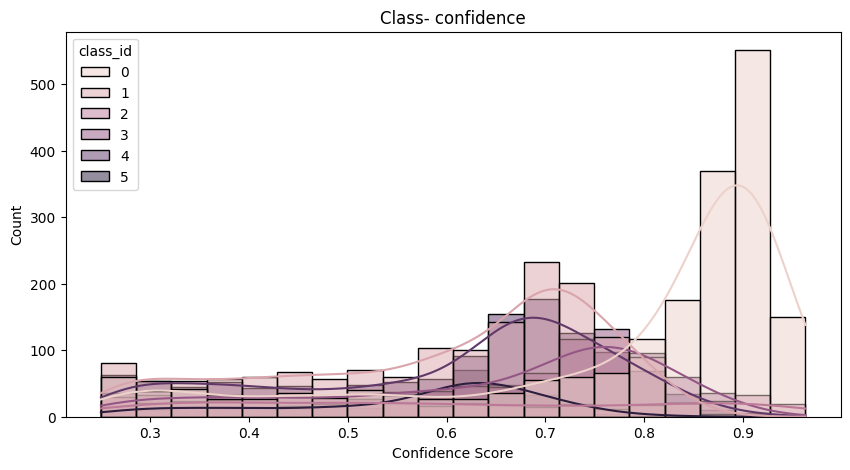

In [ ]:
# 모델 로드
model = YOLO(r"C:\Users\USER\Desktop\my_git\safebaby-xai\yolov8_explain\runs\detect\train2\weights\best.pt")

# 분석할 이미지들이 있는 폴더 경로
image_folder = r"C:\Users\USER\Desktop\my_git\safebaby-xai\yolov8_explain\Baby_Monitoring.v4i.yolov8\front_side_data"

# 클래스 이름 매핑
label_dict = {
    0: 'baby',
    1: 'close eye',
    2: 'crib',
    3: 'mouth',
    4: 'nose',
    5: 'opened eyes'
}

# 모든 이미지에 대해 YOLO 실행
image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(".jpeg")]

confidences = []
class_ids = []

# YOLO 감지 실행
for img_path in image_paths:
    results = model(img_path)
    for r in results:
        for box in r.boxes:
            confidences.append(float(box.conf))  # Confidence Score 저장
            class_ids.append(int(box.cls))  # Class ID 저장

# 데이터를 pandas DataFrame으로 변환
df = pd.DataFrame({"class_id": class_ids, "confidence": confidences})

# 클래스 이름 추가 (class_id를 class_name으로 매핑)
df['class_name'] = df["class_id"].map(label_dict)



In [ ]:
df.to_csv('front_side_df.csv', index=False, encoding='utf-8-sig')

In [9]:
df.head()

,class_id,confidence,class_name
0,0,0.901823,baby
1,4,0.735034,nose
2,5,0.561514,opened eyes
3,0,0.901734,baby
4,4,0.708147,nose


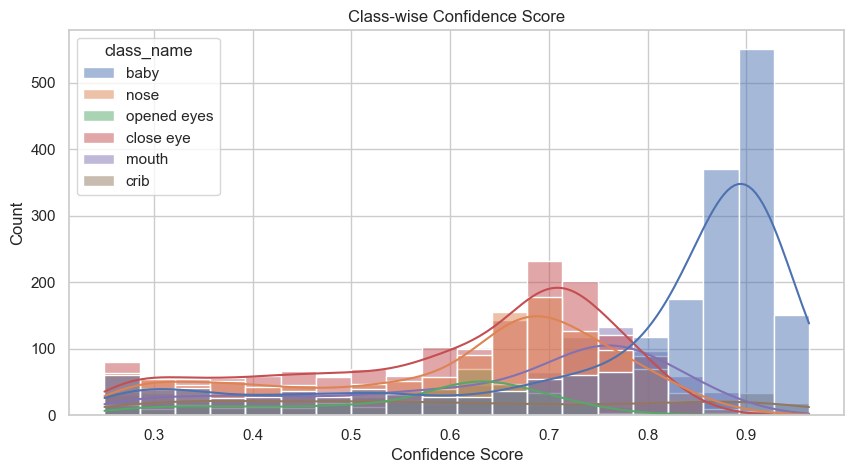

In [ ]:
# 히스토그램
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df, x="confidence", hue="class_name", bins=20, kde=True)
plt.xlabel("Confidence Score")
plt.ylabel("Count")
plt.title("Class-wise Confidence Score")
plt.show()

- baby 클래스의 confidence가 0.8~0.9 구간에 몰려있음 -> 아기 전체를 비교적 안정적으로 인식
- nose, mouth 

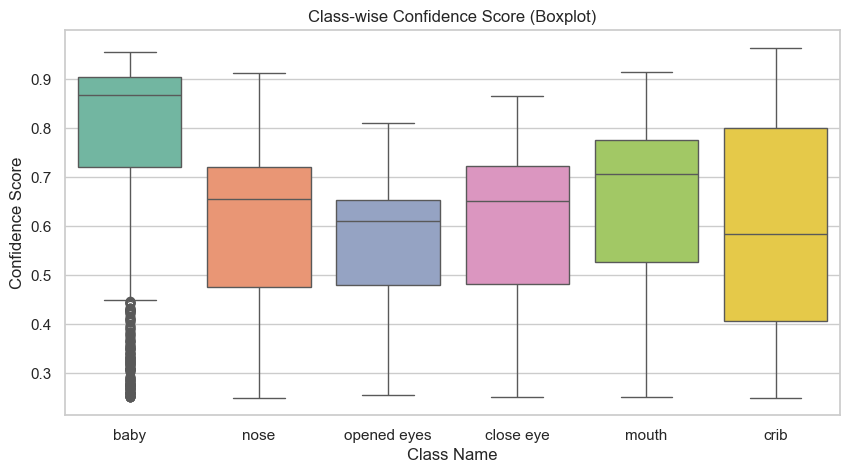

In [40]:
sns.set_theme(style="whitegrid")  # 스타일만 지정, 팔레트는 함수에 직접 지정

plt.figure(figsize=(10, 5))
sns.boxplot(x="class_name", y="confidence", data=df, hue="class_name", palette="Set2")
plt.title("Class-wise Confidence Score (Boxplot)")
plt.xlabel("Class Name")
plt.ylabel("Confidence Score")
plt.show()

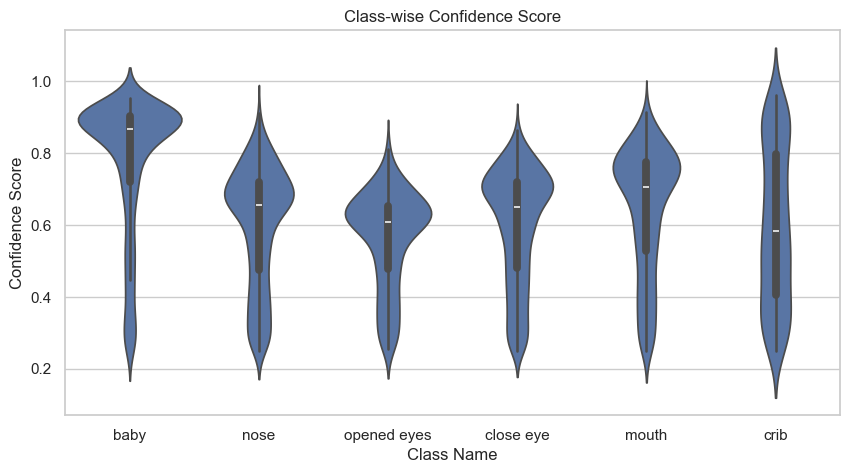

In [36]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.violinplot(x="class_name", y="confidence", data=df)
plt.title("Class-wise Confidence Score")
plt.xlabel("Class Name")
plt.ylabel("Confidence Score")
plt.show()

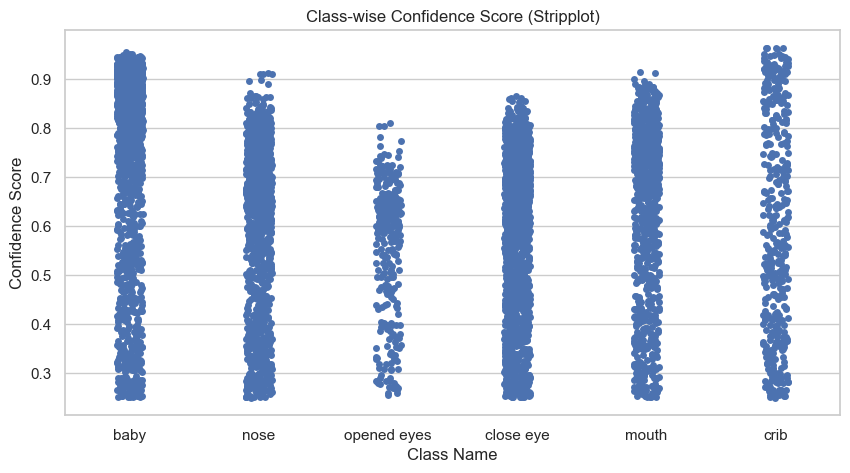

In [27]:
plt.figure(figsize=(10, 5))
sns.stripplot(x="class_name", y="confidence", data=df, jitter=True)
plt.title("Class-wise Confidence Score (Stripplot)")
plt.xlabel("Class Name")
plt.ylabel("Confidence Score")
plt.show()